In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 지난 시간 내용 다시 cover

In [3]:
document = "Human machine interface for lab abc computer applications"
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
stop_words = stopwords.words('english')
# 각 문장에서 불용어 제거, split() => "dictionary"
tokens = [[word for word in sent.lower().split() if word not in stop_words] for sent in text_corpus]
tokens

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

In [12]:
# 각 문장에서 단어의 발생 빈도 수 출력 => Counter 이용
from collections import Counter

frequency = [Counter(sent) for sent in tokens]
frequency   # gensim의 doc2bow

[Counter({'abc': 1,
          'applications': 1,
          'computer': 1,
          'human': 1,
          'interface': 1,
          'lab': 1,
          'machine': 1}),
 Counter({'computer': 1,
          'opinion': 1,
          'response': 1,
          'survey': 1,
          'system': 1,
          'time': 1,
          'user': 1}),
 Counter({'eps': 1, 'interface': 1, 'management': 1, 'system': 1, 'user': 1}),
 Counter({'engineering': 1, 'eps': 1, 'human': 1, 'system': 2, 'testing': 1}),
 Counter({'error': 1,
          'measurement': 1,
          'perceived': 1,
          'relation': 1,
          'response': 1,
          'time': 1,
          'user': 1}),
 Counter({'binary': 1,
          'generation': 1,
          'random': 1,
          'trees': 1,
          'unordered': 1}),
 Counter({'graph': 1, 'intersection': 1, 'paths': 1, 'trees': 1}),
 Counter({'graph': 1,
          'iv': 1,
          'minors': 1,
          'ordering': 1,
          'quasi': 1,
          'trees': 1,
          'well':

In [13]:
from gensim.corpora import Dictionary
dictionary = Dictionary(tokens)
print(dictionary)

Dictionary(35 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)


In [ ]:
dictionary.token2id

In [16]:
bow = [dictionary.doc2bow(line) for line in tokens]   # 단어 인덱스, 몇번 출현 튜플로 묶여서 -> 이중리스트
bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(4, 1), (10, 1), (12, 1), (13, 1), (14, 1)],
 [(3, 1), (10, 2), (13, 1), (15, 1), (16, 1)],
 [(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1)],
 [(24, 1), (26, 1), (27, 1), (28, 1)],
 [(24, 1), (26, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(9, 1), (26, 1), (30, 1)]]

### Tfidf

In [17]:
from gensim import models
tfidf_model = models.TfidfModel(bow, normalize=True)
print(tfidf_model)   # num_nnz(none-zeros): value != 0 토큰의 개수

TfidfModel(num_docs=9, num_nnz=51)


In [20]:
tfidf_model[bow[0]]   # 각 단어의 (index, tfidf_value) 튜플로 묶여서

[(0, 0.4301019571350565),
 (1, 0.4301019571350565),
 (2, 0.2944198962221451),
 (3, 0.2944198962221451),
 (4, 0.2944198962221451),
 (5, 0.4301019571350565),
 (6, 0.4301019571350565)]

### LSI model

In [24]:
lsa_model = models.LsiModel(tfidf_model[bow],   # -> tfidf 넣고자 할 때
                            #bow,   # -> 그냥 넣고자 할 때
                            num_topics=2,
                            id2word=dictionary)
lsa_model.print_topics()

[(0,
  '0.400*"system" + 0.318*"survey" + 0.290*"user" + 0.274*"eps" + 0.236*"management" + 0.236*"opinion" + 0.235*"response" + 0.235*"time" + 0.224*"interface" + 0.224*"computer"'),
 (1,
  '0.421*"minors" + 0.420*"graph" + 0.293*"survey" + 0.239*"trees" + 0.226*"paths" + 0.226*"intersection" + -0.204*"system" + -0.196*"eps" + 0.189*"ordering" + 0.189*"widths"')]

In [28]:
# 각 문서의 tfidf_value: 문장 출력하기
for doc, line in zip(lsa_model[bow], text_corpus):
  print(doc, line)

[(0, 0.9882674931915884), (1, -0.5817492124466889)] Human machine interface for lab abc computer applications
[(0, 1.93783482071753), (1, -0.0609163217999278)] A survey of user opinion of computer system response time
[(0, 1.4233137790002814), (1, -0.8079634037455732)] The EPS user interface management system
[(0, 1.5759735963204822), (1, -0.9783181398247545)] System and human system engineering testing of EPS
[(0, 1.1938073820824961), (1, -0.18647173777267326)] Relation of user perceived response time to error measurement
[(0, 0.10587542351791714), (1, 0.4938286990000434)] The generation of random binary unordered trees
[(0, 0.34904516626812415), (1, 1.111468207223769)] The intersection graph of paths in trees
[(0, 0.7008225277758218), (1, 2.027744116731683)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6838619755923048), (1, 1.1340723063702194)] Graph minors A survey


### Fingerprinting
- 문서의 내용을 요약한 간단한 숫자들의 집합
- "토픽 핑거프린팅"
- 문장/문서 1이 각 토픽에 관련된 점수를 그림으로 나타내기

In [31]:
doc1 = bow[0]
doc1

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

In [32]:
lsa_model[doc1]

[(0, 0.9882674931915884), (1, -0.5817492124466889)]

In [38]:
import pandas as pd
df = pd.DataFrame(lsa_model[doc1], columns=['Topic', 'Relevance']).set_index("Topic")
df

,Relevance
Topic,
0,0.988267
1,-0.581749


In [50]:
# plot
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

Human machine interface for lab abc computer applications


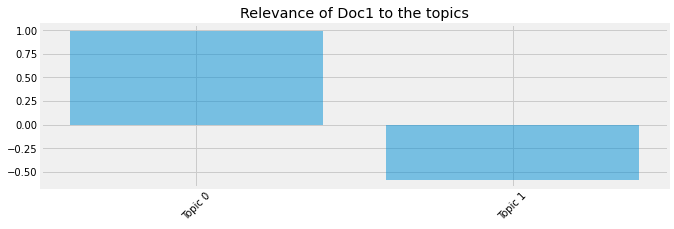

In [52]:
print(text_corpus[0])
size = len(df)

plt.figure(figsize=(10, 3))
ax = plt.bar(
    range(size),
    df.Relevance,   # 그릴 것
    linewidth = 1,
    alpha = 0.5
)
plt.xticks(np.arange(size),
          [f'Topic {i}' for i in range(size)],
           fontsize=10,
           rotation=45)

plt.title("Relevance of Doc1 to the topics")
plt.show()

### save & load

In [54]:
dictionary.save('/lsa.dict')
lsa_model.save('lsa.model')

model = models.LsiModel.load('lsa.model')

# 실습: tweets.csv
- tweets.csv의 'text'열로 LsiModel 만들어서 핑거프린팅하기
- 전처리는 트위터인걸 고려해서 맞춰서

In [ ]:
PATH = "/content/drive/MyDrive/01. Programming/Practical NLP/data/Week 18/Tweets.csv"
df = pd.read_csv(PATH)
texts = df['text'].tolist()
texts

In [76]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

texts_tokenized = [tweet_tokenizer.tokenize(sent) for sent in texts]
tokens = [[word for word in line if word not in stop_words and word.isalnum()] for line in texts_tokenized]   # 14640

In [78]:
frequency = [Counter(sent) for sent in tokens]
dictionary = Dictionary(tokens)
bow = [dictionary.doc2bow(line) for line in tokens] 

In [109]:
NUM_TOPICS = 2   # for modeling, matplot

tfidf_model = models.TfidfModel(bow, normalize=True)
lsa_model = models.LsiModel(bow,   # -> 그냥 넣고자 할 때
                            num_topics=NUM_TOPICS,
                            id2word=dictionary)
lsa_model.print_topics()

[(0,
  '0.894*"I" + 0.297*"flight" + 0.121*"get" + 0.090*"Cancelled" + 0.057*"time" + 0.055*"need" + 0.051*"Flight" + 0.050*"service" + 0.049*"help" + 0.049*"2"'),
 (1,
  '0.829*"flight" + -0.386*"I" + 0.250*"Cancelled" + 0.136*"Flightled" + 0.082*"get" + 0.082*"Flight" + 0.081*"delayed" + 0.061*"hours" + 0.058*"Flighted" + 0.057*"2"')]

@VirginAmerica why can't we book seats on your flights when we buy them or even during check in? Creates so much anxiety! #frustrated


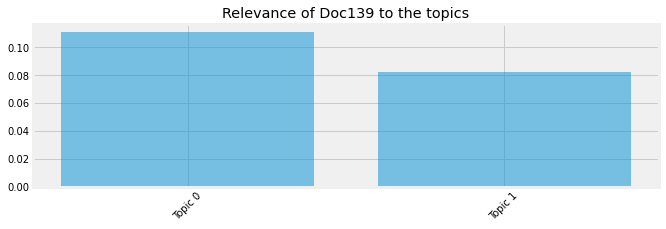

In [114]:
def get_fingerprinting(idx):
  print(texts[idx])

  relevance = lsa_model[bow[idx]][0][1], lsa_model[bow[idx]][1][1]
  size = NUM_TOPICS

  plt.figure(figsize=(10, 3))
  ax = plt.bar(
      range(size),
      relevance,   # 그릴 것
      linewidth = 1,
      alpha = 0.5
  )
  plt.xticks(np.arange(size),
            [f'Topic {i}' for i in range(size)],
            fontsize=10,
            rotation=45)

  plt.title(f"Relevance of Doc{idx} to the topics")
  plt.show()

get_fingerprinting(139)